In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import scipy.stats as stats
%matplotlib inline

In [ ]:
#나눔체 설치하기
!apt-get update -qq
!apt-get install fonts-nanum* -qq

#위 설치후 현재 시스템에 설치된 폰트확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

#코랩에서의 한글폰트 설정

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size = 9)
fm._rebuild()

plt.rc('font', family = 'NanumGothic')
plt.rc("axes", unicode_minus =False)

!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

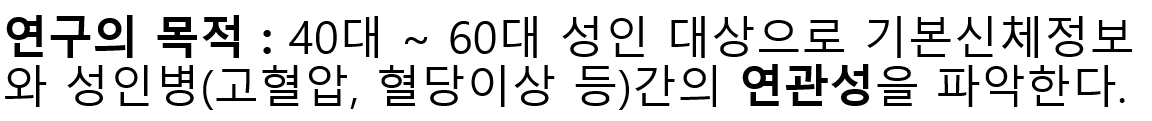

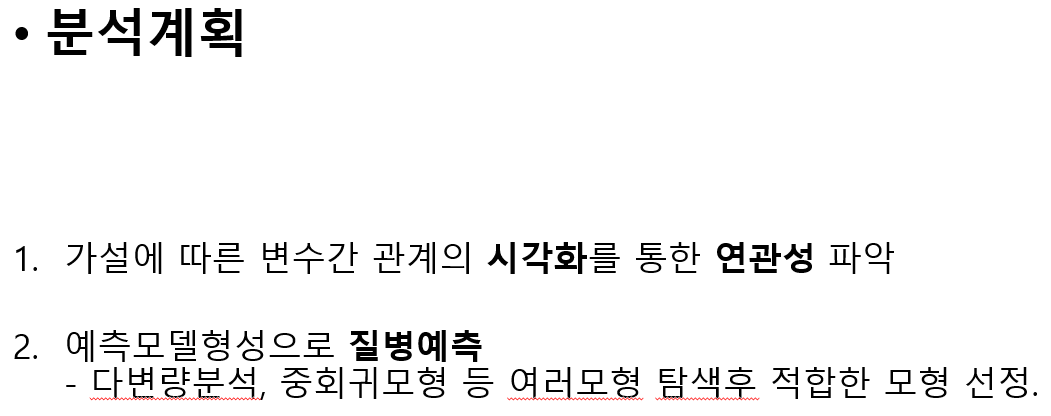

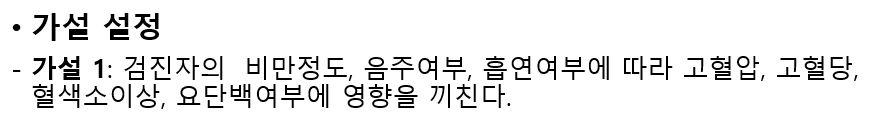

- 칼럼에 따른 질병진단여부, 질병진단수치 -> ppt 데이터분석8 참고할 것.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/통계상담및실습/국민건강보험공단_건강검진정보_20191231.csv", encoding="cp949")
df.shape

In [ ]:
df.head(10)

In [ ]:
#성별코드 MW 변환
print(df["성별코드"].value_counts())
df.loc[df["성별코드"] == 1, "성별코드"] = "M"
df.loc[df["성별코드"] == 2, "성별코드"] = "W"
print(df["성별코드"].value_counts())

#흡연상태 YN 변환
print(df["흡연상태"].value_counts())
df.loc[df["흡연상태"] == 1, "흡연상태"] = "N"
df.loc[df["흡연상태"] == 2, "흡연상태"] = "Y"
print(df["흡연상태"].value_counts())

In [ ]:
# 결측치처리
print(df["음주여부"].value_counts())
df.loc[df["음주여부"] != 1,"음주여부"] = "N"
df.loc[df["음주여부"] == 1,"음주여부"] = "Y"
print(df["음주여부"].value_counts())


In [ ]:
# BMI 지수 생성. BMI = 체중(kg)/(신장(m)^2)
weights = df["체중(5Kg 단위)"].values
heights = (df["신장(5Cm단위)"].values/100)**2
BMI = weights/heights
print(weights,weights.shape ,heights, heights.shape)
print(BMI, BMI.shape)
df["BMI"] = BMI

In [ ]:
# 이상치처리(삭제)
# 100 < 신장 < 220 / 30 < 체중 < 200/ 35 < 허리둘레 < 125/ 60 < 수축기혈압 < 240
# 40 < 이완기혈압 < 160/ 10 < BMI < 40/ 6 < 혈색소수치 < 20/ 40 < 공복혈당 < 300
# AST < 200/ ALT < 200/ 감마지피티 < 300
print("원데이터 데이터프레임 : ", df.shape)
df2 = df[(df['신장(5Cm단위)'] > 100) & (df['신장(5Cm단위)'] <220)]
print("신장(5Cm단위) 이상치삭제 데이터프레임 : ", df2.shape)
print("*"*50)
df2 = df2[(df2['체중(5Kg 단위)'] > 30) & (df2['체중(5Kg 단위)'] <200)]
print("체중(5Kg 단위) 이상치삭제 데이터프레임 : ", df2.shape)
print("*"*50)
df2 = df2[(df2['허리둘레'] > 35) & (df2['허리둘레'] <125)]
print("허리둘레 이상치삭제 데이터프레임 : ", df2.shape)
print("*"*50)
ak = '수축기 혈압'
df2 = df2[(df2[ak] > 60) & (df2[ak] <240)]
print(ak +" 이상치삭제 데이터프레임 : ", df2.shape)
print("*"*50)
ak = '이완기 혈압'
df2 = df2[(df2[ak] > 40) & (df2[ak] <160)]
print(ak +" 이상치삭제 데이터프레임 : ", df2.shape)
print("*"*50)
ak = '혈색소'
df2 = df2[(df2[ak] > 6) & (df2[ak] <20)]
print(ak +" 이상치삭제 데이터프레임 : ", df2.shape)
print("*"*50)
ak = '식전혈당(공복혈당)'
df2 = df2[(df2[ak] > 40) & (df2[ak] <300)]
print(ak +" 이상치삭제 데이터프레임 : ", df2.shape)
print("*"*50)
ak = '(혈청지오티)AST'
df2 = df2[(df2[ak] <200)]
print(ak +" 이상치삭제 데이터프레임 : ", df2.shape)
print("*"*50)
ak = '(혈청지오티)ALT'
df2 = df2[(df2[ak] <200)]
print(ak +" 이상치삭제 데이터프레임 : ", df2.shape)
print("*"*50)
ak = '감마 지티피'
df2 = df2[(df2[ak] <200)]
print(ak +" 이상치삭제 데이터프레임 : ", df2.shape)
print("*"*50)
ak = '혈청크레아티닌'
df2 = df2[(df2[ak] <100)]
print(ak +" 이상치삭제 데이터프레임 : ", df2.shape)
print("*"*50)
#40세 ~ 60세 연령대만 가져오기
#새로운 데이터프레임 df2 생성
print("이상치삭제 데이터프레임 : ", df2.shape)
df2 = df2[(df2["연령대 코드(5세단위)"] >= 9) & (df2["연령대 코드(5세단위)"] <= 14)]
print("현데이터 데이터프레임 : ", df2.shape)
# 워우 절반이상이 타노스!

In [ ]:
cols = ['성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부']

In [ ]:
df2[cols].hist(figsize = (12,12))
plt.show()

#분석1
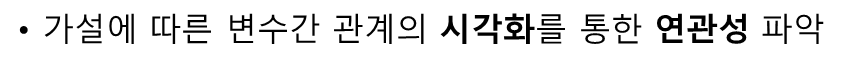

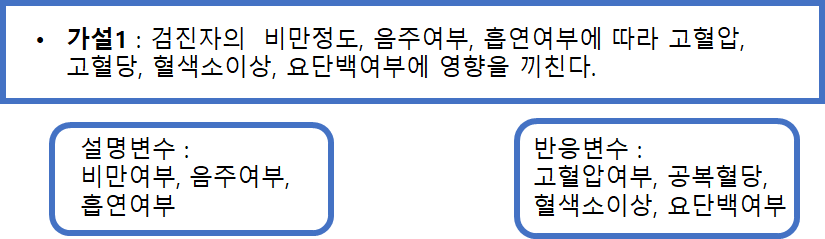

In [ ]:
#기준에 따른 고혈압여부 컬럼 생성
df2["고혈압여부"] = "N"
print(df2["고혈압여부"].value_counts())
df2.loc[(df2['수축기 혈압'] >= 139) & (df2['이완기 혈압']>=89), "고혈압여부"] = "Y"
print(df2["고혈압여부"].value_counts())
df2["저혈압여부"] = "N"
print(df2["저혈압여부"].value_counts())
df2.loc[(df2['수축기 혈압'] <= 90) & (df2['이완기 혈압'] < 60), "저혈압여부"] = "Y"
print(df2["저혈압여부"].value_counts())

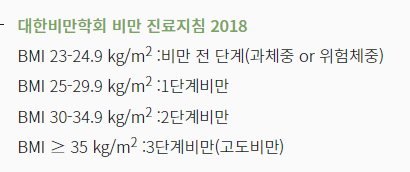
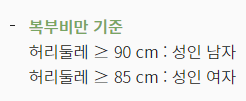
대한비만학회 - 비만상식 - 비만의 진단과 평가
출처 : http://general.kosso.or.kr/html/?pmode=obesityDiagnosis

In [ ]:
#기준에 따른 비만여부 컬럼 생성
df2["허리둘레비만여부"] = "N"
print(df2["허리둘레비만여부"].value_counts())
df2.loc[(df2['허리둘레'] >= 90) & (df2['성별코드'] == "M"), "허리둘레비만여부"] = "Y"
df2.loc[(df2['허리둘레'] >= 85) & (df2['성별코드'] == "W"), "허리둘레비만여부"] = "Y"
print(df2["허리둘레비만여부"].value_counts())
print("*"*50)
# BMI는 좀 이상하다.. 25이상이 비만이라고 한다면, 180 80인 나도 비만임; 나 체지방률 15%이하인데?
df2["BMI비만여부"] = "N"
print(df2["BMI비만여부"].value_counts())
df2.loc[(df2['BMI'] >= 25), "BMI비만여부"] = "Y"
print(df2["BMI비만여부"].value_counts())

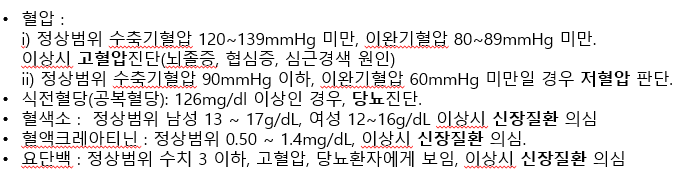

In [ ]:
#기준에 따른 당뇨여부 컬럼 생성
df2["당뇨여부"] = "N"
print(df2["당뇨여부"].value_counts())
df2.loc[(df2['식전혈당(공복혈당)'] >= 126), "당뇨여부"] = "Y"
print(df2["당뇨여부"].value_counts())

In [ ]:
#기준에 따른 혈색소이상 컬럼 생성
df2["혈색소이상"] = "N"
print(df2["혈색소이상"].value_counts())
df2.loc[(df2['혈색소'] < 13) | (df2['혈색소'] > 17) & (df2['성별코드'] == "M"), "혈색소이상"] = "Y"
df2.loc[(df2['혈색소'] < 12) | (df2['혈색소'] > 16) & (df2['성별코드'] == "W"), "혈색소이상"] = "Y"
print(df2["혈색소이상"].value_counts())

In [ ]:
#기준에 따른 혈청크레아티닌 컬럼 생성
df2["혈청크레아티닌이상"] = "N"
print(df2["혈청크레아티닌이상"].value_counts())
df2.loc[(df2['혈청크레아티닌'] < 0.5) | (df2['혈청크레아티닌'] > 1.4), "혈청크레아티닌이상"] = "Y"
print(df2["혈청크레아티닌이상"].value_counts())

In [ ]:
#기준에 따른 요단백이상 컬럼 생성
df2["요단백이상"] = "N"
print(df2["요단백이상"].value_counts())
df2.loc[(df2['요단백'] > 3) , "요단백이상"] = "Y"
print(df2["요단백이상"].value_counts())

In [ ]:
#40~60대 연령대를 절반으로 나누어 범주화, 컬럼생성
df2["연령대범주"] = "40~54세"
print(df2["연령대 코드(5세단위)"].value_counts())
print(df2["연령대 코드(5세단위)"].value_counts(normalize = True))

df2.loc[df2["연령대 코드(5세단위)"] > 11, "연령대범주"] = "55~69세"
print(df2["연령대범주"].value_counts())
print(df2["연령대범주"].value_counts(normalize = True))


In [ ]:
# df2_sample = df2.sample(n = 5000, random_state= 1)
total = len(df2)
print(total)

# 통계상담및실습 12

In [ ]:
import scipy.stats as stats
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
desease = ["고혈압여부", "당뇨여부", "혈색소이상", "요단백이상"]
cause = ["허리둘레비만여부", "흡연상태", "음주여부"]
sexuality = "성별코드"# M or W

In [ ]:
cont0 = []
for g in desease:
  cont0.append(pd.crosstab([df2.성별코드,df2[cause[0]]], df2[g], normalize='index', margins = True))

for i in cont0:
  print(i)
  print("")

# for i,a in enumerate(cont0):
#   plt.figure(figsize = (12,8))
#   a.iloc[:,:2]
#   plt.grid()
#   plt.title("성별, 비만 - "+desease[i])
#   plt.show()


for i,a in enumerate(cont0):
  plt.figure(figsize = (6,4))
  a.iloc[:-1,1].plot(kind = "bar", rot = 0 , color = ["skyblue","skyblue", "pink", "pink"])
  plt.grid(axis= "y")
  plt.title("성별, 비만 - "+desease[i])
  plt.show()


In [ ]:
cont0 = []
for g in desease:
  cont0.append(pd.crosstab([df2.성별코드,df2[cause[1]]], df2[g], normalize='index', margins = True))

for i in cont0:
  print(i)
  print("")

for i,a in enumerate(cont0):
  plt.figure(figsize = (6,4))
  a.iloc[:-1,1].plot(kind = "bar", rot = 0 , color = ["skyblue","skyblue", "pink", "pink"])
  plt.grid(axis= "y")
  plt.title("성별, 흡연 - "+desease[i])
  plt.show()

In [ ]:
cont0 = []
for g in desease:
  cont0.append(pd.crosstab([df2.성별코드,df2[cause[2]]], df2[g], normalize='index', margins = True))

for i in cont0:
  print(i)
  print("")

for i,a in enumerate(cont0):
  plt.figure(figsize = (6,4))
  a.iloc[:-1,1].plot(kind = "bar", rot = 0 , color = ["skyblue","skyblue", "pink", "pink"])
  plt.grid(axis= "y")
  plt.title("성별, 음주 - "+desease[i])
  plt.show()

#카이제곱검정 시행

#코크란 멘텔 헨젤 검정

In [ ]:
pip install cmh

In [ ]:
from cmh import CMH

In [ ]:
a = df2[["성별코드","흡연상태",desease[0]]]
a

In [ ]:
print(cause)
print(desease)

In [ ]:
for i in cause:
  for j in desease:
    print(i,j)
    result = CMH(df2, i,j, stratifier= sexuality)
    print(result)
    print("*"*100)

흡연상태 - 고혈압여부 에서 집단의 원인-질병간 연관에 영향을 끼치지 않음.

--> 흡연상태 - 고혈압여부를 제외한 나머지는 성별집단을 분류하고, 나머지는 통합

#카이제곱 검정. 흡연 -고혈압만 성별구분하여 시행, 나머진 통합하여 시행
카이제곱검정

H0 : 서로 독립이다
H1 : 서로 독립이 아니다.


if pvalue < alpha(= 0.05)


  H0 기각


else
  H0 채택


집단분류후 카이제곱검정 시행

집단분류 (흡연-고혈압은 분류안함) 후 분할표 재생성

In [ ]:
# print(cause)
# print(desease)

In [ ]:
# con1M = []
# con1W = []
# con2M = []
# con2W = []
# con3M = []
# con3W = []


# for j in desease:
#   con1M.append(pd.crosstab(df2.loc[df2.성별코드 == "M", cause[0]], df2[j])) 
#   con1W.append(pd.crosstab(df2.loc[df2.성별코드 == "W", cause[0]], df2[j]))

# con2M.append(pd.crosstab(df2.loc[:, cause[1]], df2[desease[0]]))
# con2W.append(pd.crosstab(df2.loc[:, cause[1]], df2[desease[0]]))
# for j in desease[1:]:
#   con2M.append(pd.crosstab(df2.loc[df2.성별코드 == "M", cause[1]], df2[j]))
#   con2W.append(pd.crosstab(df2.loc[df2.성별코드 == "W", cause[1]], df2[j]))
# for j in desease:
#   con3M.append(pd.crosstab(df2.loc[df2.성별코드 == "M", cause[2]], df2[j]))
#   con3W.append(pd.crosstab(df2.loc[df2.성별코드 == "W", cause[2]], df2[j]))


In [ ]:
# def check_chi2_cont(x):
#   for num,i in enumerate(x):
#     print(desease[num])
#     if stats.chi2_contingency(i)[1] > 0.05:
#       print("="*50)
#       print("귀무가설 채택!, 원인-질병 연관없음!")
#     print("CHi-square : {}".format(stats.chi2_contingency(i,correction =True)[0]))
#     print("pvalue : {}".format(stats.chi2_contingency(i,correction =True)[1]))
#     if stats.chi2_contingency(i)[1] > 0.05:
#       print("="*50)    

In [ ]:
# print(cause)
# print(desease)
# print(sexuality)

In [ ]:
# print(cause[0])
# check_chi2_cont(con1M)
# print("M")
# check_chi2_cont(con1W)
# print("W")

In [ ]:
# print(cause[1])
# print({"고혈압여부는 남자여자 구분안함. 구분되어있지만 성별구분없는 데이터가 들어감"})
# print("M")
# check_chi2_cont(con2M)
# print("W")
# check_chi2_cont(con2W)

In [ ]:
# print(cause[2])
# print("M")
# check_chi2_cont(con3M)
# print("W")
# check_chi2_cont(con3W)

여성집단의 음주 - 혈색소이상은 독립이고,

나머지 원인 - 질병변수간 독립이 아니다.


--> 원인-질병간 연관이 있다.

#오즈비 확인

In [ ]:
# # ,C : 원인/ D : 질병
# #  H0 : P(질병발생|원인있음) = P(질병발생|원인없음) -> 원인에 따른 질병발생은 연관이 없다.
# #  H1 : not H0
# #  =
# #  H0 : (P(D+|C+)/P(D-|C+))/((P(D+|C-)/P(D-|C-)) = 1
# #  H1 : (P(D+|C+)/P(D-|C+))/((P(D+|C-)/P(D-|C-)) != 1
# # --> (C+D+)*(C-D-)/((C+D-)*(C-D+))
# def check_odds_ratio(cont):
#   OR = (cont.iloc[1,1]*cont.iloc[0,0])/(cont.iloc[1,0]*cont.iloc[0,1])
#   return OR

In [ ]:
# def find_odds_CI(cont, alpha = 0.05):
#   v = 1/cont.iloc[0,0] + 1/cont.iloc[0,1] +1/cont.iloc[1,0] +1/cont.iloc[1,1]
#   OR = (cont.iloc[1,1]*cont.iloc[0,0])/(cont.iloc[1,0]*cont.iloc[0,1])
#   a = OR*(np.exp(-1.96*np.sqrt(v)))
#   b = OR*(np.exp(1.96*np.sqrt(v)))
#   CI = [a,b]
#   if (CI[0] < 1) and (CI[1] > 1):
#     print("="*50)
#     print("!!!!!!!!!!!!!!!!!! CI contains 1 !!!!!!!!!!!!!!!!!!")
#   print("OR = {}".format(OR))
#   print("CI for OR = {}".format(CI))
#   if (CI[0] < 1) and (CI[1] > 1):
#     print("="*50)
#   return 

In [ ]:
# print(cause[0])
# print("MAN")
# for k,i in enumerate(con1M):
#   print(desease[k])
#   find_odds_CI(i)
# print("*"*50)
# print("WOMAN")
# for k,i in enumerate(con1W):
#   print(desease[k])
#   find_odds_CI(i)
# print("*"*50)
# print("-"*50)

# print(cause[1])
# print("MAN")
# for k,i in enumerate(con2M):
#   print(desease[k])
#   find_odds_CI(i)
# print("*"*50)
# print("WOMAN")
# for k,i in enumerate(con2W):
#   print(desease[k])
#   find_odds_CI(i)
# print("*"*50)
# print("-"*50)

# print(cause[2])
# print("MAN")
# for k,i in enumerate(con3M):
#   print(desease[k])
#   find_odds_CI(i)
# print("*"*50)
# print("WOMAN")
# for k,i in enumerate(con3W):
#   print(desease[k])
#   find_odds_CI(i)
# print("*"*50)
# print("-"*50)

--> 위 카이제곱검정 결과와 동일하게,

여성집단에서 음주-혈색소이상은 변수간 독립이고,

나머지 항목들은 독립이 아님을 확인할 수 있다.